# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
df = pd.read_csv("sharktank.csv")
df.head()


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
df.loc[:, "Corcoran":"Guest"] = df.loc[:, "Corcoran":"Guest"].fillna(0)
df


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
df.dtypes
df["Amount"] = df["Amount"].str.replace(',', '')
df["Amount"] = df["Amount"].str.replace('$', '')
df["Equity"] = df["Equity"].str.replace('%', '')

df["Amount"] = pd.to_numeric(df["Amount"])
df["Equity"] = pd.to_numeric(df["Equity"])

df

<ipython-input-4-799556eba402>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Amount"] = df["Amount"].str.replace('$', '')


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
import numpy as np

#Calculating the worth of a company
df["valuable"] = df["Amount"]/df["Equity"] * 100

#Finds companies with zero Equity and ignores
df.loc[:, "valuable"] = df.loc[:, "valuable"].replace(np.inf, 0)

#Most valuable company
df.loc[[df["valuable"].idxmax()]]

#Company with largest total investment
#df.loc[[df["Amount"].idxmax()]]


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,valuable
421,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,with an option for another $2.5 Million for an...,25000000.0


In [6]:
#Company with largest total investment
df.loc[[df["Amount"].idxmax()]]


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,valuable
483,6.0,27.0,AirCar,Yes,Green/CleanTech,Male,5000000.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Contingent on getting deal to bring to contine...,10000000.0


**YOUR EXPLANATION HERE**

After calculating the valuations for each company. We can come to the conclusion that the most valuable company (Zipz) and the company that received the most investment (AirCar) are not the same. 

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [7]:
# ENTER CODE HERE.
#Make a new column that contains the total of sharks that invested in each company
df["Sharks"] = df.loc[:, "Corcoran": "Guest"].sum(axis = 1)

#Calculate the amount each shark invested Investment = Amount/Sharks(n)
df["Investment"] = df["Amount"]/df["Sharks"]

#Multiply and Add each Sharks' investment to get their total and display it
df.loc[:, "Corcoran": "Guest"].mul(df["Investment"], axis = 0).sum(axis = 0).sort_values(ascending = False)


Cuban         17817500.0
Herjavec      16297500.0
Greiner        8170000.0
John           8154000.0
O'Leary        7952500.0
Corcoran       4912500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

**YOUR EXPLANATION HERE**

We first added a new column that store how many sharks invested in each company and added them. We then use the hint to divide the total investment each shark gave to each company. Finally we calculated the amount of money for each shark by multiplying the investment in each company by each shark column, and then added all of it together. With these calculations we can see that Cuban is the biggest investor with a total of 17.8 million dollars.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

249


Industry
Green/CleanTech           4.527273
Media / Entertainment     5.533333
Business Services         6.539394
Uncertain / Other         6.539394
Pet Products              8.551515
Healthcare                9.054545
Consumer Products         9.557576
Software / Tech          16.600000
Fitness / Sports         20.121212
Children / Education     27.666667
Lifestyle / Home         35.212121
Fashion / Beauty         46.781818
Food and Beverage        52.315152
Name: Funding_Rate, dtype: float64

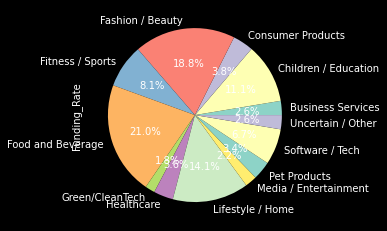

In [8]:
# ENTER CODE HERE.
funded_business = df[(df["Deal"] == "Yes")].index.tolist()
print(len(funded_business)) #Total Businesses that got a deal 249 out of 495

total_industries = df["Industry"] #all 495 industries

df["Funding_Rate"] = len(funded_business)/len(total_industries)
funding_rate = df["Funding_Rate"]

#source: https://pythonspot.com/matplotlib-pie-chart/
#:~:text=The%20matplotlib%20module%20can%20be%20used%20to%20create
#,plot.%20The%20code%20below%20creates%20a%20pie%20chart%3A

df.groupby("Industry").sum()["Funding_Rate"].plot.pie(autopct='%1.1f%%')
df.groupby("Industry").sum()["Funding_Rate"].sort_values()


In [13]:
df[df['Industry']=="Healthcare"]['Deal'].count()
df[df['Industry']=="Healthcare"]['Deal']

0      Yes
20     Yes
24      No
69     Yes
169    Yes
177    Yes
222     No
229     No
230     No
266     No
268    Yes
293     No
322     No
332     No
340    Yes
364    Yes
424    Yes
489    Yes
Name: Deal, dtype: object

<AxesSubplot:xlabel='Industry'>

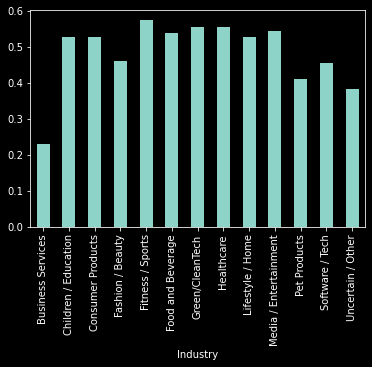

In [58]:
industries = df.groupby("Industry")["Deal"].value_counts()
industries

yes = industries.loc[:,"Yes"] 
yes
# percents = industries.loc[:,"Yes"] / ( industries.loc[:,"Yes"] +  industries.loc[:,"no"] )
no = industries.loc[:,"No"] 
total = yes + no
percent = yes /  total
percent.plot.bar()

**YOUR EXPLANATION HERE**

After counting and sorting the information. It looks like the majority of sharks prefer to invest in the Food and Beverage industry.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn
4. Demo your lab.